In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import anndata as ad
import scvelo as scv
import scipy as sc
import seaborn as sns

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_all_params.h5ad')
c57 = adata.to_df('allele_c57').transpose()
cast = adata.to_df('allele_cast').transpose()

In [3]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [4]:
df_asc_total_kon = adata.var.sort_values('total_kon').head(40)
df_asc_total_kon.head(10)

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
Bad,ENSMUSG00000024959,19,6951898,6941861,+,1801.0,2554.0,0.413548,0.586452,268.332938,...,7918.073410,0.415205,148.914132,3954.266700,2.622319,45.747026,7918.073410,0.001,1.362094,1.000000
Tmem183a,ENSMUSG00000042305,1,134361999,134346097,-,2885.0,3296.0,0.466753,0.533247,316.628692,...,1900.187656,0.368548,19.920511,1682.767777,1.269025,13.790794,1900.187656,NaN,NaN,NaN
B3gnt9-ps,ENSMUSG00000069920,8,105255153,105252638,-,9986.0,10541.0,0.486481,0.513519,334.535755,...,1618.955439,0.001000,156.828722,1.000000,0.366954,7.082273,1618.955439,0.001,156.828722,1.000000
Casp6,ENSMUSG00000027997,3,129914103,129901425,+,5082.0,5006.0,0.503767,0.496233,350.483179,...,2214.633032,0.057696,7.919131,704.417976,1.325808,10.588932,2214.633032,0.001,1.361910,2.280972
Spata2,ENSMUSG00000047030,2,167492887,167481133,-,2057.0,2233.0,0.479487,0.520513,324.594405,...,2545.393489,0.021339,0.938734,105.623406,0.228855,51.814392,2545.393489,NaN,NaN,NaN
Itgb1,ENSMUSG00000025809,8,128733200,128685654,+,15974.0,3962.0,0.801264,0.198736,539.387596,...,1.000000,0.778739,5.914616,1454.031267,4.753058,0.001000,1.000000,0.001,1.361825,28.576200
Smu1,ENSMUSG00000028409,4,40757923,40736542,-,1844.0,1849.0,0.499323,0.500677,307.819025,...,1.000000,0.296478,69.007888,2923.909486,3.523745,0.001000,1.000000,0.001,1.361866,28.504634
Lzts2,ENSMUSG00000035342,19,45027104,45015176,+,4359.0,6615.0,0.397212,0.602788,273.224355,...,1847.656166,0.106520,1.244313,227.131241,1.160713,13.223167,1847.656166,NaN,NaN,NaN
Eri1,ENSMUSG00000031527,8,35495533,35465265,-,4661.0,4555.0,0.505751,0.494249,339.017255,...,1814.621044,0.085870,8.124858,1639.289035,0.281808,10.014806,1814.621044,NaN,NaN,NaN


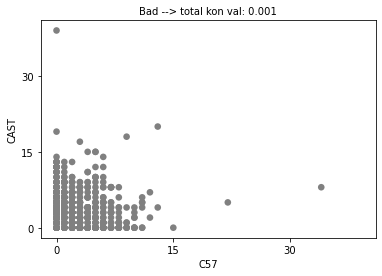

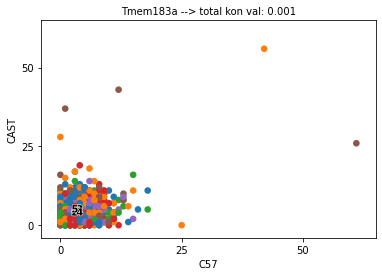

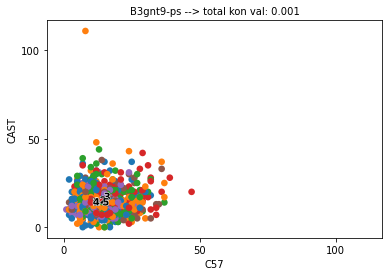

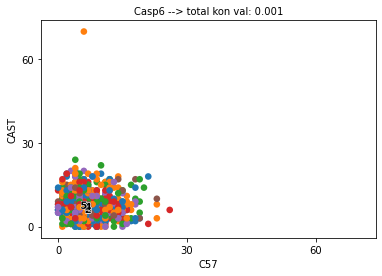

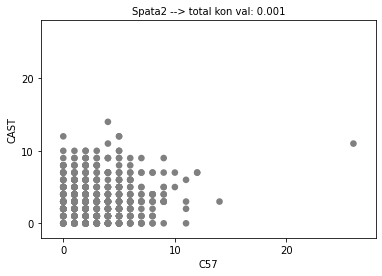

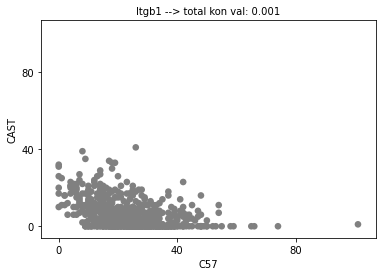

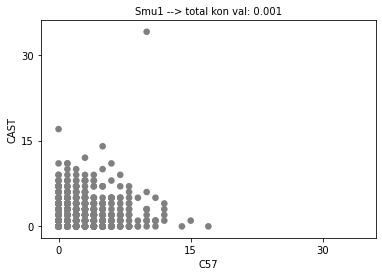

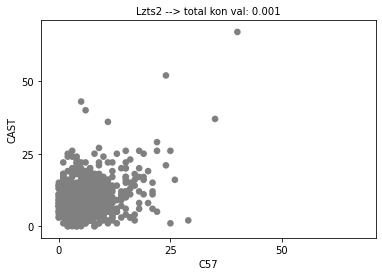

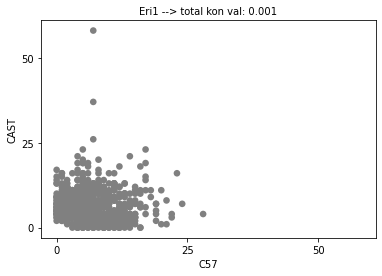

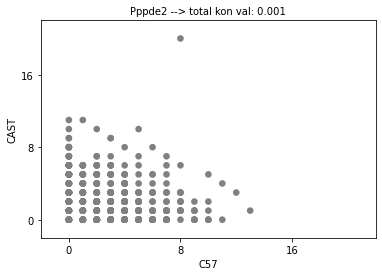

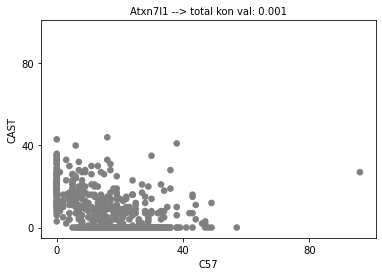

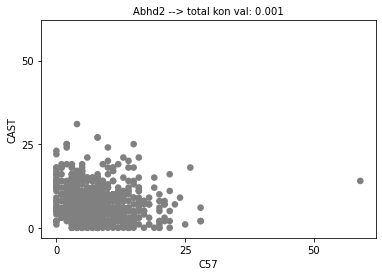

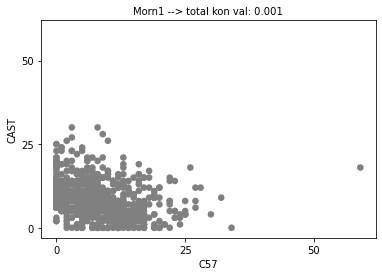

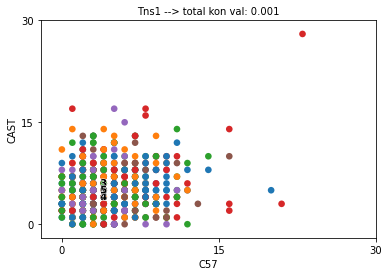

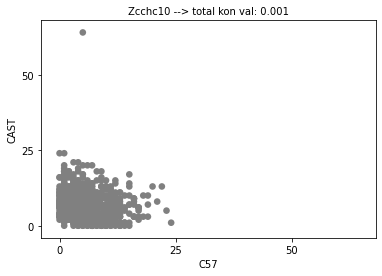

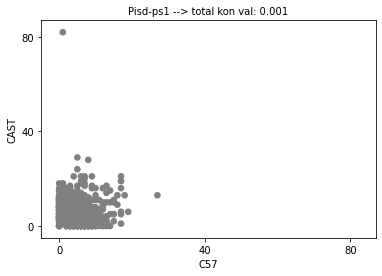

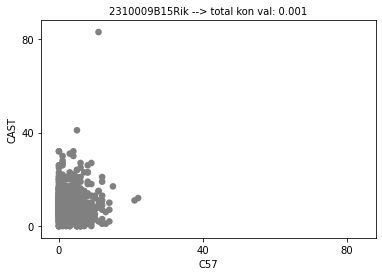

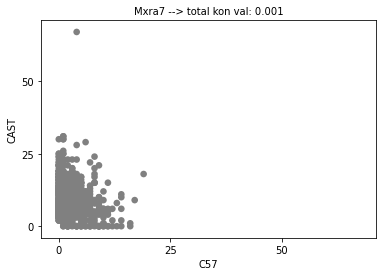

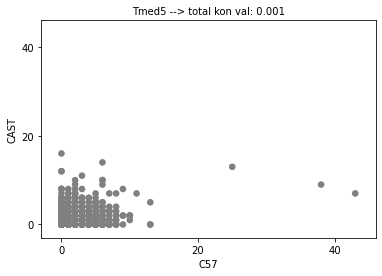

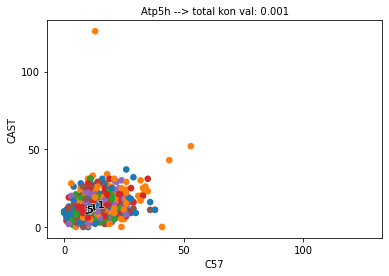

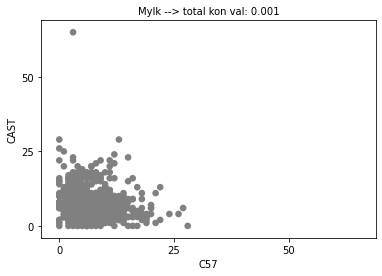

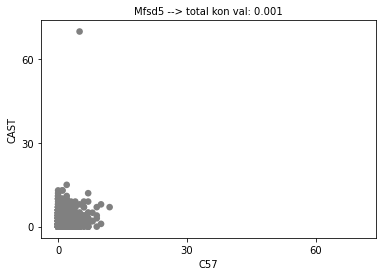

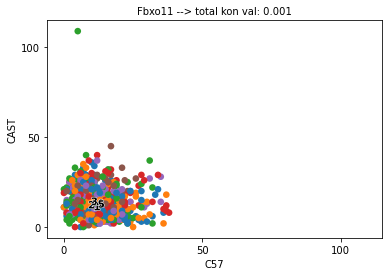

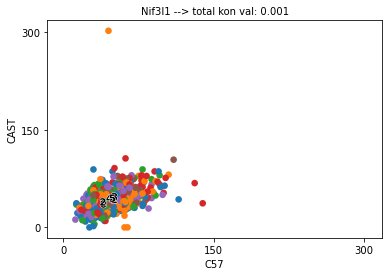

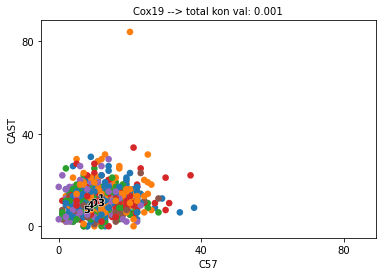

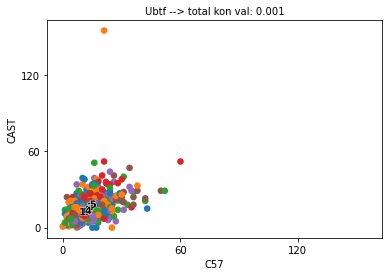

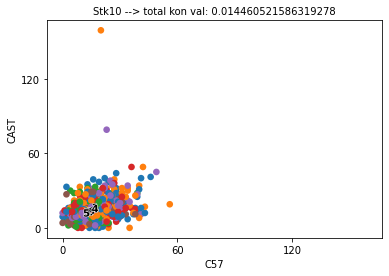

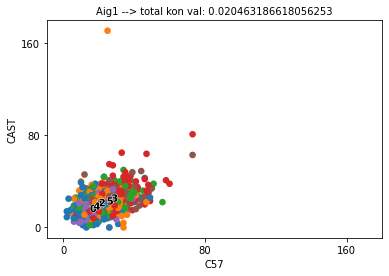

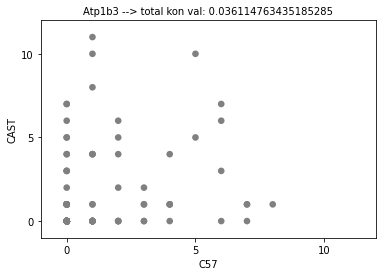

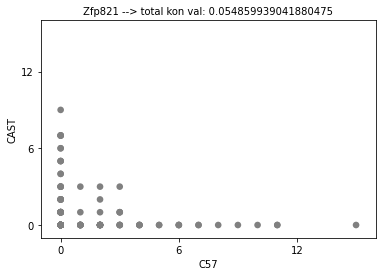

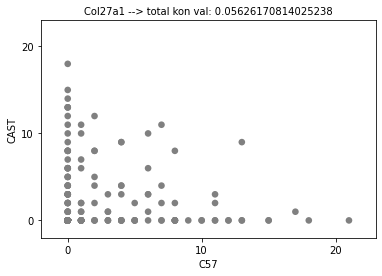

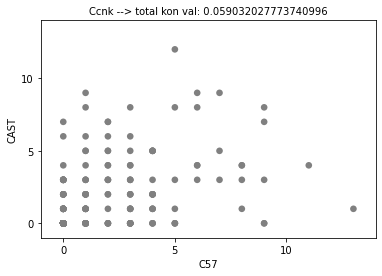

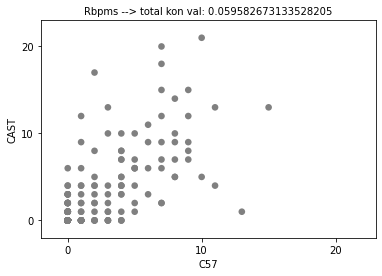

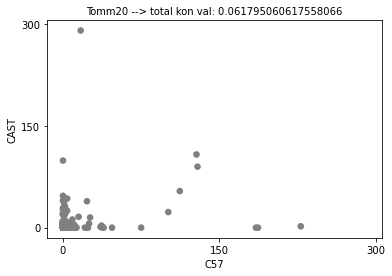

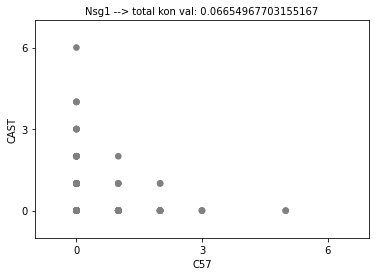

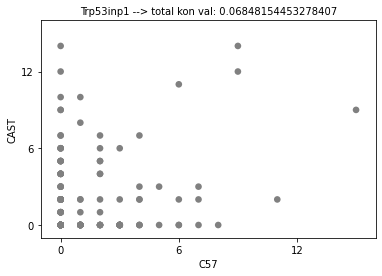

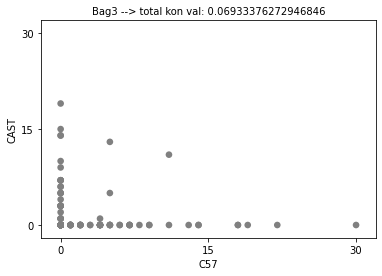

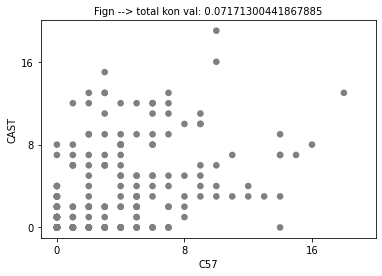

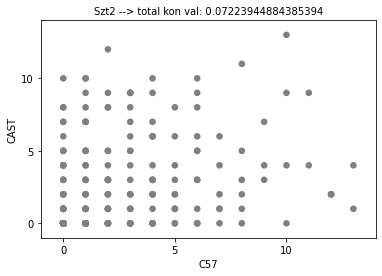

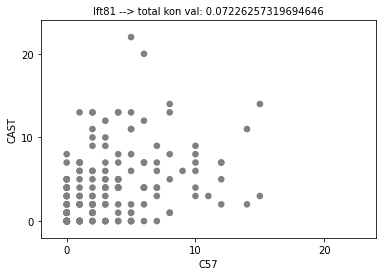

In [25]:
for x in list(df_asc_total_kon.index):
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, color=['clusters'], normalize_data= False, 
                   xlabel='C57', ylabel='CAST', title=f"{x} --> total kon val: {(adata.var.loc[x]['total_kon'])}", 
                   xlim=x_lim, ylim=y_lim)

In [28]:
df_desc_total_kon = adata.var.sort_values('total_kon', ascending=False).head(40)
df_desc_total_kon.head(10)

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
Fos,ENSMUSG00000021250,12,85477273,85473890,+,20118.0,34691.0,0.367057,0.632943,237.080882,...,2312.990289,0.080219,3.969628,347.903181,0.193442,2.067916,2312.990289,NaN,NaN,NaN
Dnttip2,ENSMUSG00000039756,3,122285269,122274414,+,13942.0,13077.0,0.516007,0.483993,354.478261,...,1470.442534,0.233250,158.339718,1.000000,1.948092,30.366427,1470.442534,0.001,1.361846,159.250228
Ywhaq,ENSMUSG00000076432,12,21417637,21390071,-,21429.0,22267.0,0.490411,0.509589,334.360015,...,11404.307192,0.258050,18.637555,3226.668612,3.970932,14.336889,11404.307192,0.001,1.361946,51.770166
Atf4,ENSMUSG00000042406,15,80257540,80255184,+,31244.0,26915.0,0.537217,0.462783,365.778421,...,1.000000,0.160135,2.679532,115.879335,2.525168,0.001000,1.000000,0.001,1.361841,52.141956
D1Ertd622e,ENSMUSG00000044768,1,97662074,97643903,-,19406.0,20857.0,0.481981,0.518019,328.922122,...,1653.991412,0.012336,0.699183,116.512507,0.457844,9.072062,1653.991412,NaN,NaN,NaN
Ftsjd1,ENSMUSG00000046441,8,110224489,110217960,+,17595.0,50022.0,0.260216,0.739784,177.320926,...,326.031054,0.001000,0.270624,17.797615,0.138953,1.660708,326.031054,NaN,NaN,NaN
Fh1,ENSMUSG00000026526,1,175625635,175600374,-,26282.0,23398.0,0.529026,0.470974,360.001995,...,4578.426391,0.055515,1.811952,173.917190,2.634536,19.973669,4578.426391,0.001,1.362195,13.384392
Rbm25,ENSMUSG00000010608,12,83683123,83632234,+,25954.0,27948.0,0.481503,0.518497,329.294007,...,3426.901783,1.901430,8.577662,2392.798463,2.176215,19.052621,3426.901783,NaN,NaN,NaN
Zfp148,ENSMUSG00000022811,16,33503903,33380775,+,21394.0,25268.0,0.458489,0.541511,313.145362,...,1267.069336,0.861336,14.008000,2138.813378,1.298418,9.881474,1267.069336,NaN,NaN,NaN


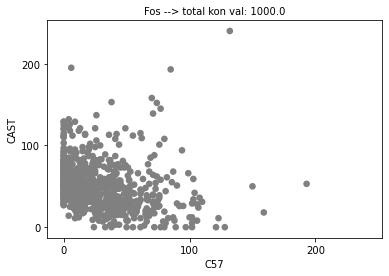

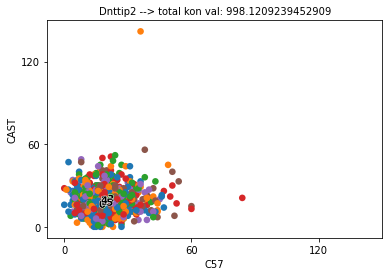

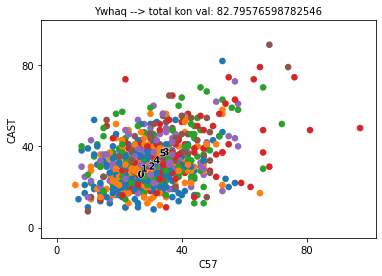

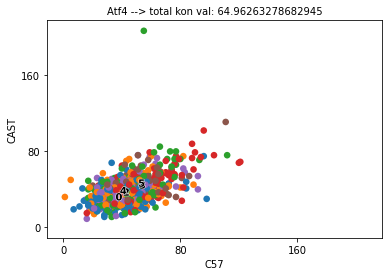

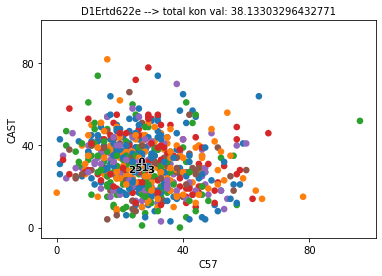

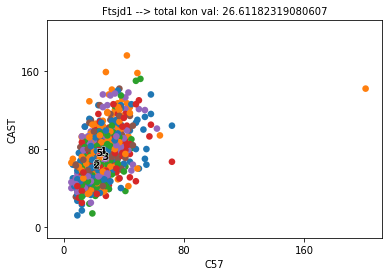

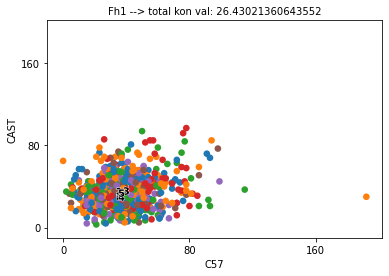

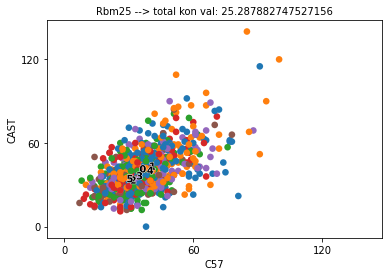

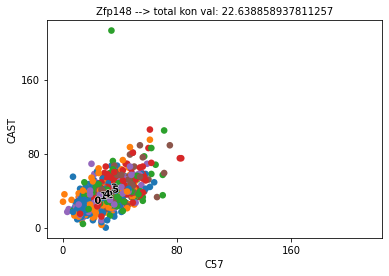

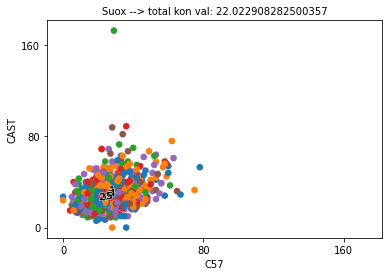

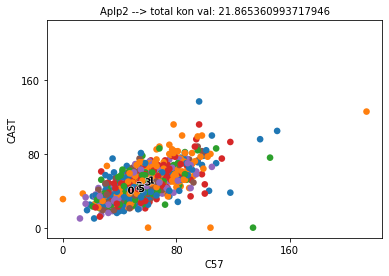

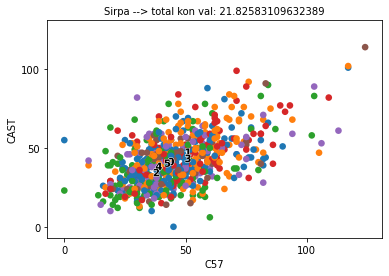

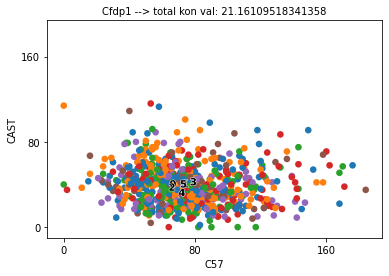

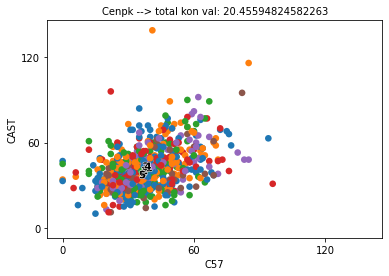

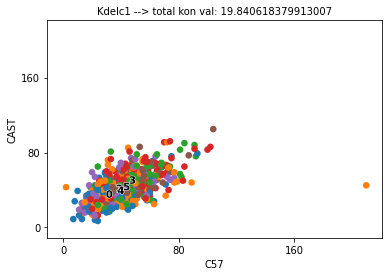

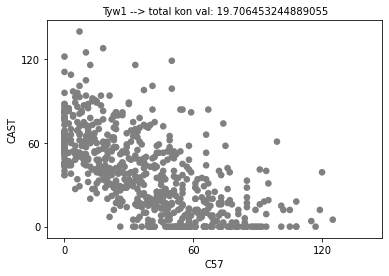

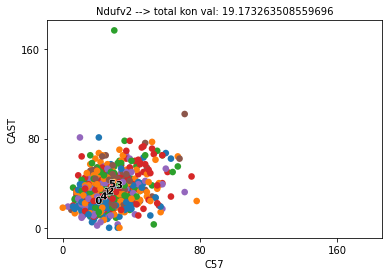

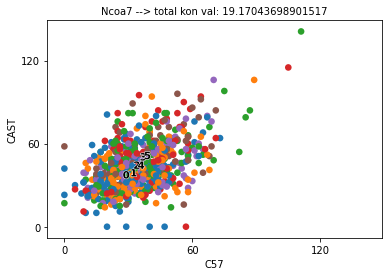

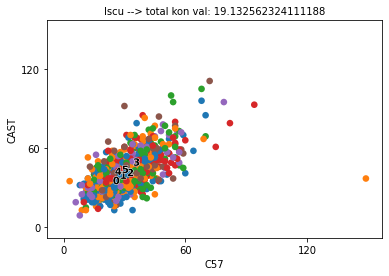

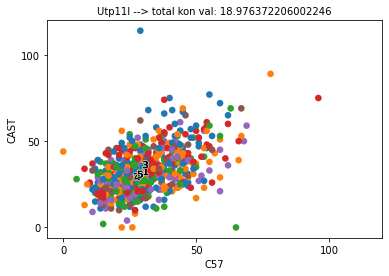

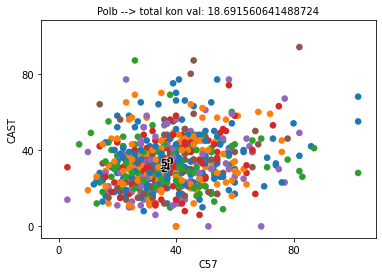

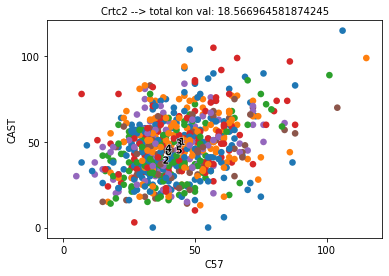

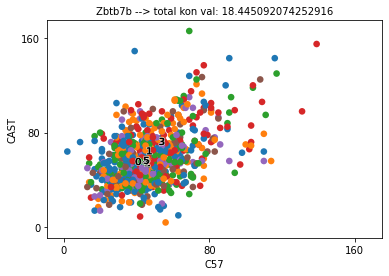

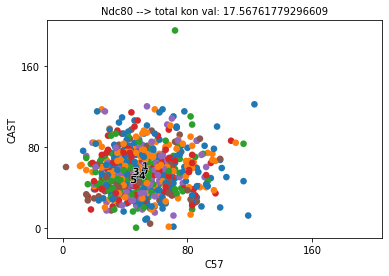

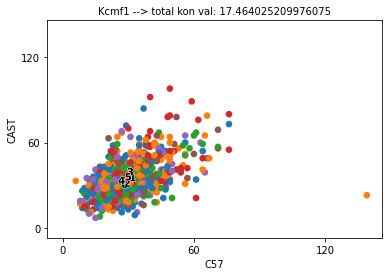

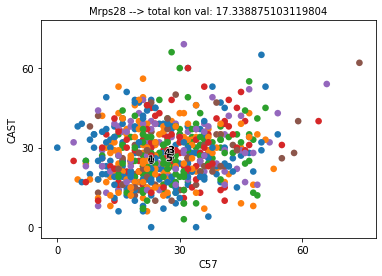

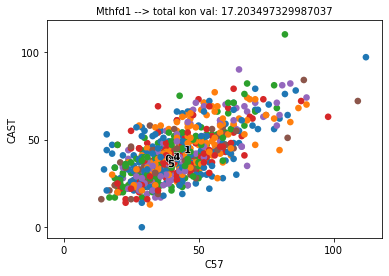

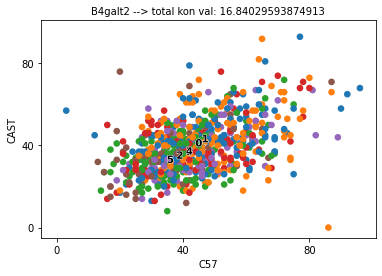

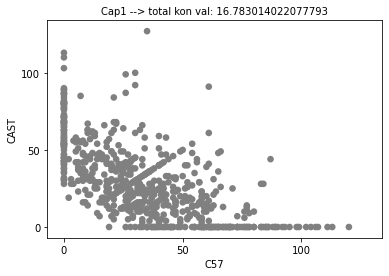

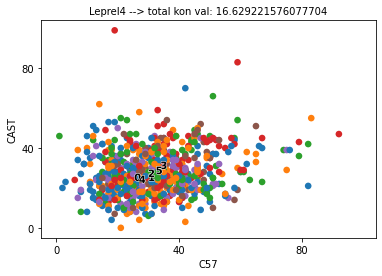

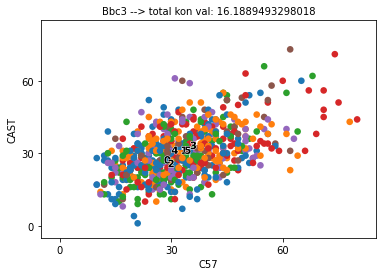

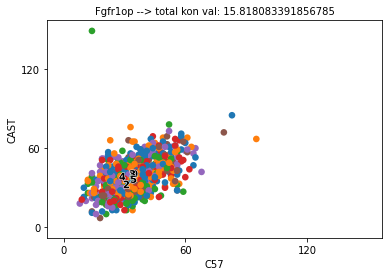

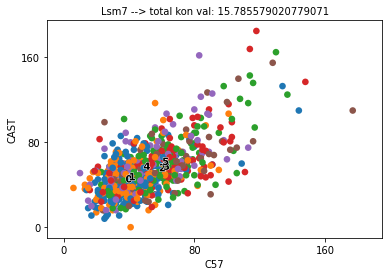

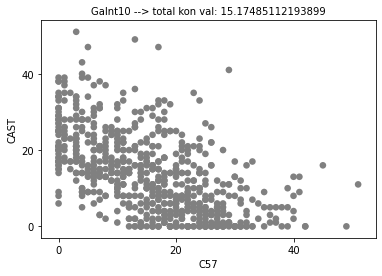

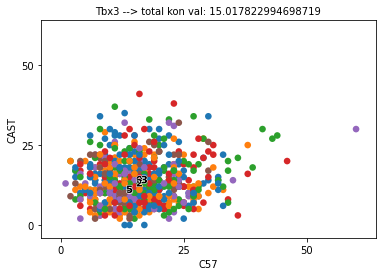

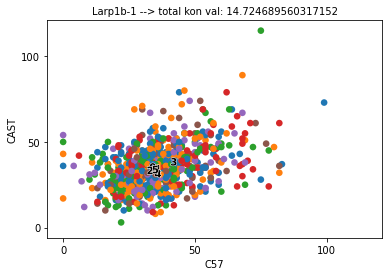

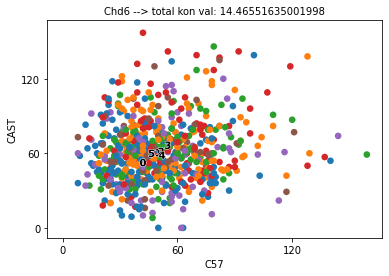

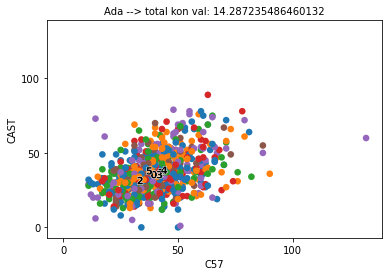

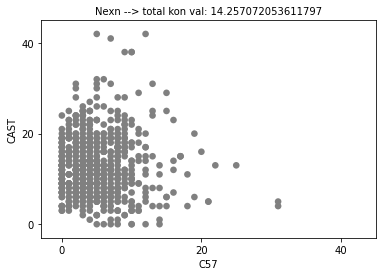

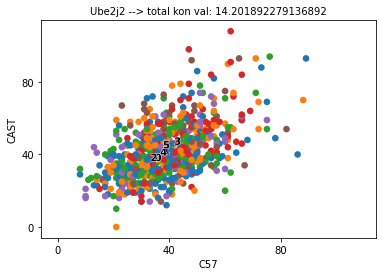

In [29]:
for x in list(df_desc_total_kon.index):
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, color=['clusters'], normalize_data= False,
                   xlabel='C57', ylabel='CAST', title=f"{x} --> total kon val: {(adata.var.loc[x]['total_kon'])}",
                   xlim=x_lim, ylim=y_lim)

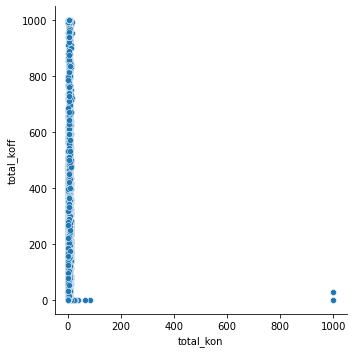

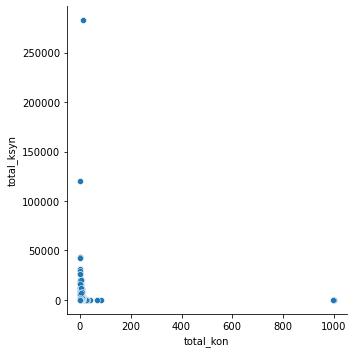

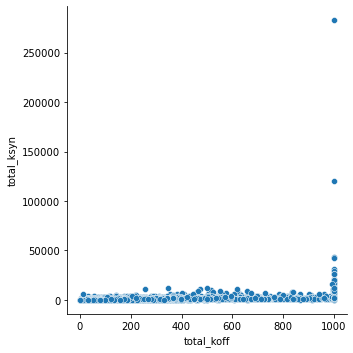

In [5]:
sns.relplot(data=adata.var, x="total_kon", y="total_koff")
sns.relplot(data=adata.var, x="total_kon", y="total_ksyn")
sns.relplot(data=adata.var, x="total_koff", y="total_ksyn")

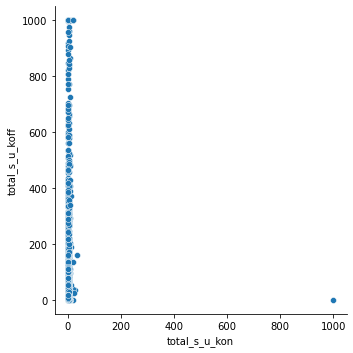

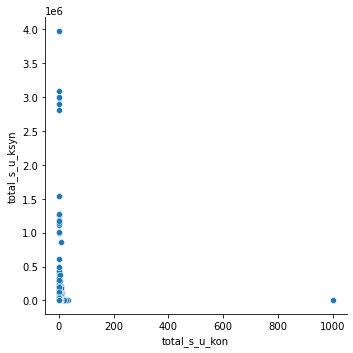

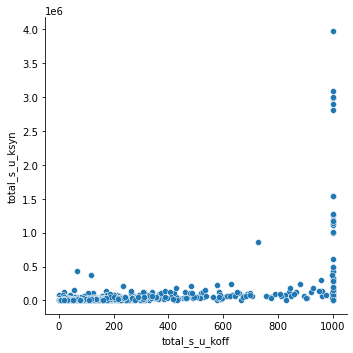

In [6]:
sns.relplot(data=adata.var, x="total_s_u_kon", y="total_s_u_koff")
sns.relplot(data=adata.var, x="total_s_u_kon", y="total_s_u_ksyn")
sns.relplot(data=adata.var, x="total_s_u_koff", y="total_s_u_ksyn")

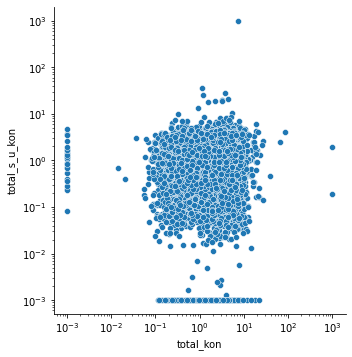

In [10]:
sns.relplot(data=adata.var, x="total_kon", y="total_s_u_kon")
plt.yscale('log')
plt.xscale('log')

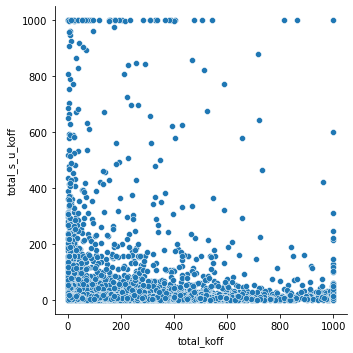

In [13]:
sns.relplot(data=adata.var, x="total_koff", y="total_s_u_koff")


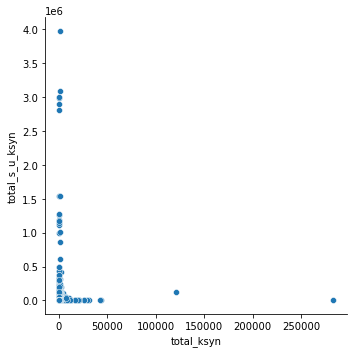

In [14]:
sns.relplot(data=adata.var, x="total_ksyn", y="total_s_u_ksyn")

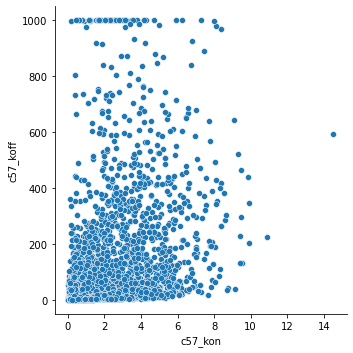

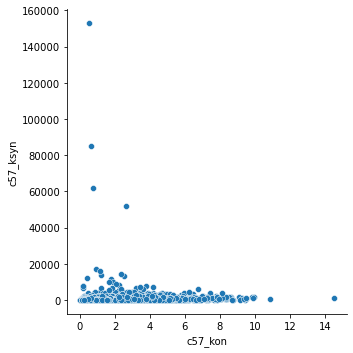

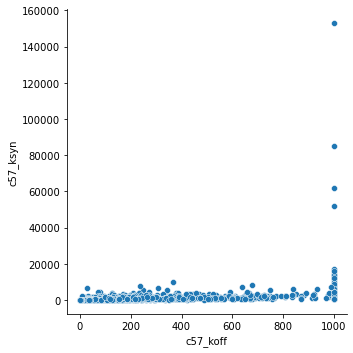

In [11]:
sns.relplot(data=adata.var, x="c57_kon", y="c57_koff")
sns.relplot(data=adata.var, x="c57_kon", y="c57_ksyn")
sns.relplot(data=adata.var, x="c57_koff", y="c57_ksyn")

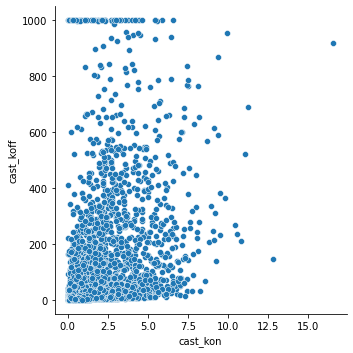

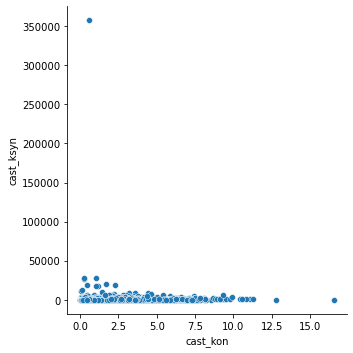

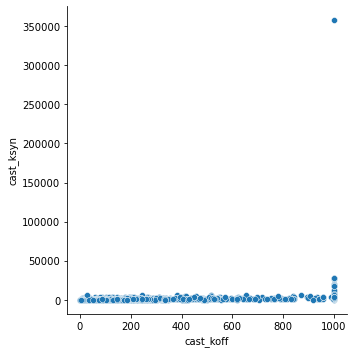

In [12]:
sns.relplot(data=adata.var, x="cast_kon", y="cast_koff")
sns.relplot(data=adata.var, x="cast_kon", y="cast_ksyn")
sns.relplot(data=adata.var, x="cast_koff", y="cast_ksyn")

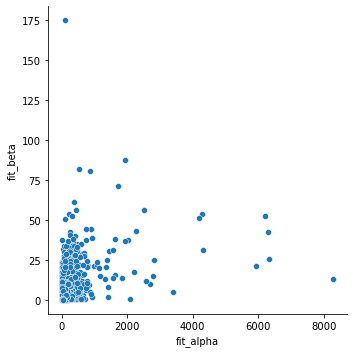

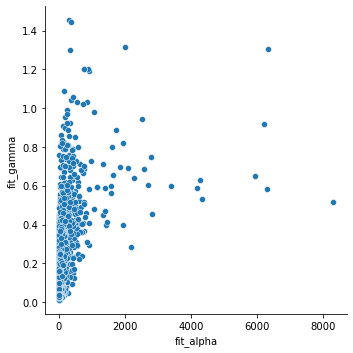

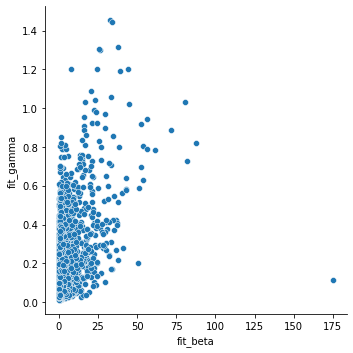

In [13]:
sns.relplot(data=adata.var, x="fit_alpha", y="fit_beta")
sns.relplot(data=adata.var, x="fit_alpha", y="fit_gamma")
sns.relplot(data=adata.var, x="fit_beta", y="fit_gamma")

In [31]:
adata.var['sum_allele_total'] = adata.var['sum_allele_c57'] + adata.var['sum_allele_cast']

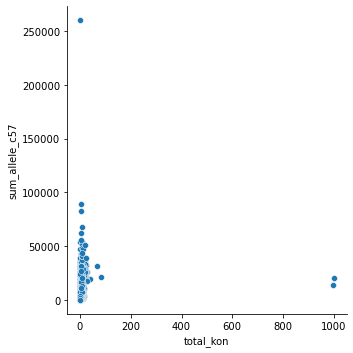

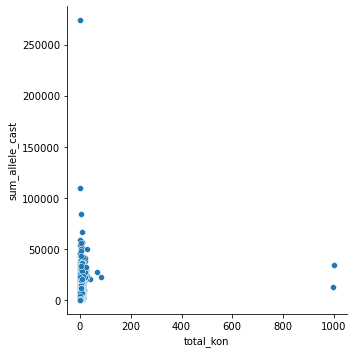

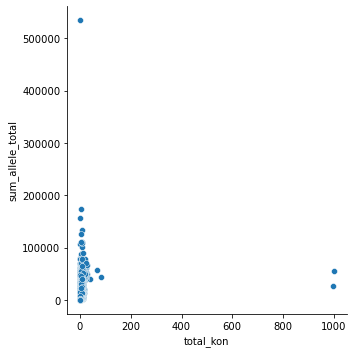

In [32]:
sns.relplot(data=adata.var, x="total_kon", y="sum_allele_c57")
sns.relplot(data=adata.var, x="total_kon", y="sum_allele_cast")
sns.relplot(data=adata.var, x="total_kon", y="sum_allele_total")

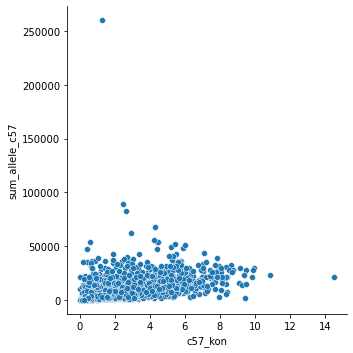

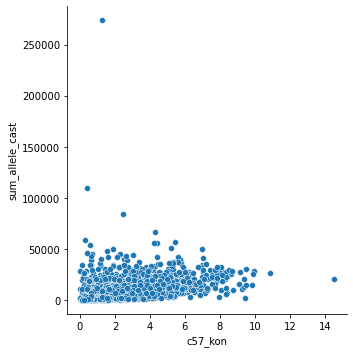

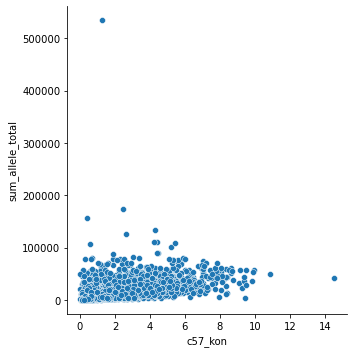

In [33]:
sns.relplot(data=adata.var, x="c57_kon", y="sum_allele_c57")
sns.relplot(data=adata.var, x="c57_kon", y="sum_allele_cast")
sns.relplot(data=adata.var, x="c57_kon", y="sum_allele_total")

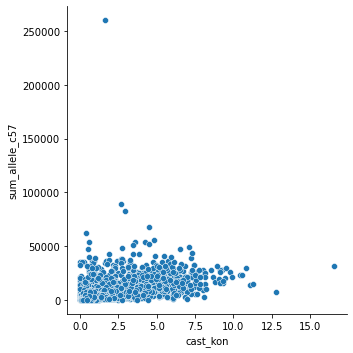

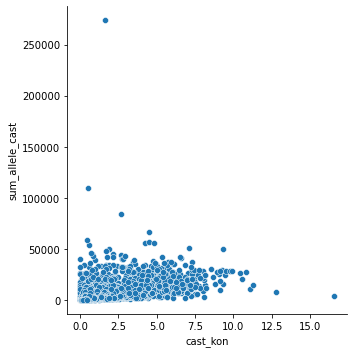

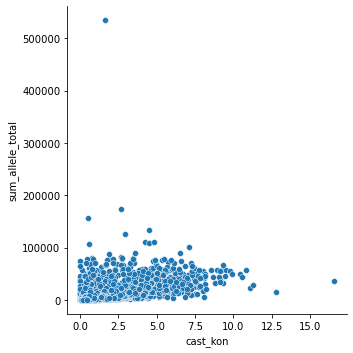

In [34]:
sns.relplot(data=adata.var, x="cast_kon", y="sum_allele_c57")
sns.relplot(data=adata.var, x="cast_kon", y="sum_allele_cast")
sns.relplot(data=adata.var, x="cast_kon", y="sum_allele_total")

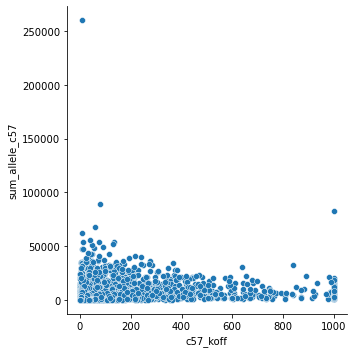

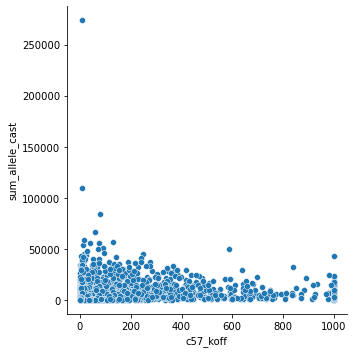

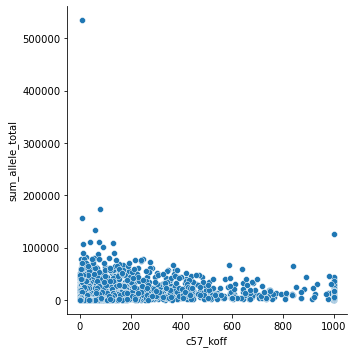

In [35]:
sns.relplot(data=adata.var, x="c57_koff", y="sum_allele_c57")
sns.relplot(data=adata.var, x="c57_koff", y="sum_allele_cast")
sns.relplot(data=adata.var, x="c57_koff", y="sum_allele_total")

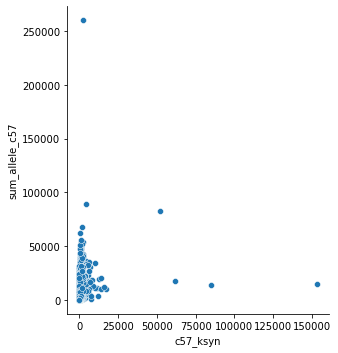

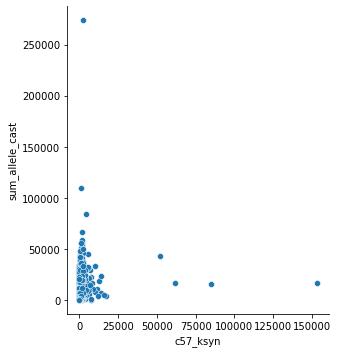

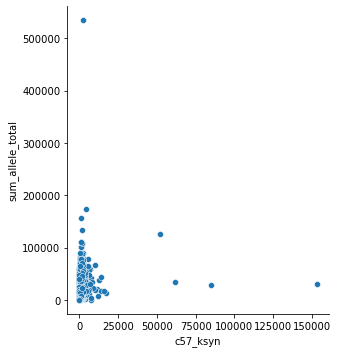

In [36]:
sns.relplot(data=adata.var, x="c57_ksyn", y="sum_allele_c57")
sns.relplot(data=adata.var, x="c57_ksyn", y="sum_allele_cast")
sns.relplot(data=adata.var, x="c57_ksyn", y="sum_allele_total")